<a href="https://colab.research.google.com/github/kiran081105-creator/supply_chain_analysis/blob/main/late_delivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('supply_chain.csv', encoding ='latin-1')
df.head()


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
df = df.drop_duplicates()

In [ ]:
df = df.dropna(subset=["Late_delivery_risk"])

In [ ]:
df["order_date"] = pd.to_datetime(df["order date (DateOrders)"], errors="coerce")
df["shipping_date"] = pd.to_datetime(df["shipping date (DateOrders)"], errors="coerce")

In [ ]:
# Shipping duration (actual days)
df["shipping_days"] = (df["shipping_date"] - df["order_date"]).dt.days

In [ ]:
# Extract useful features from order_date
df["order_year"] = df["order_date"].dt.year
df["order_month"] = df["order_date"].dt.month
df["order_weekday"] = df["order_date"].dt.weekday

# Fill NaN shipping_days with median
df["shipping_days"] = df["shipping_days"].fillna(df["shipping_days"].median())


In [ ]:
features = [
    "Days for shipment (scheduled)",
    "Days for shipping (real)",
    "shipping_days",
    "Sales",
    "Order Item Quantity",
    "Order Item Discount Rate",
    "Order Item Product Price",
    "order_month",
    "order_weekday",
    "Shipping Mode",
    "Order Region",
    "Order State"
]

df_model = df[features + ["Late_delivery_risk"]]


In [ ]:
cat_cols = ["Shipping Mode", "Order Region", "Order State"]

le = LabelEncoder()
for col in cat_cols:
    df_model[col] = le.fit_transform(df_model[col].astype(str))


/tmp/ipython-input-3984602516.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[col] = le.fit_transform(df_model[col].astype(str))
/tmp/ipython-input-3984602516.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[col] = le.fit_transform(df_model[col].astype(str))
/tmp/ipython-input-3984602516.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [ ]:
X = df_model.drop("Late_delivery_risk", axis=1)
y = df_model["Late_delivery_risk"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [ ]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestClassifier(max_depth=12, n_estimators=200, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9754487037447375

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     20396
           1       0.96      1.00      0.98     24734

    accuracy                           0.98     45130
   macro avg       0.98      0.97      0.98     45130
weighted avg       0.98      0.98      0.98     45130



Late delivery prediction model performs exceptionally well, achieving 97.5% accuracy with an almost perfect ability to identify delayed shipments. The model shows 100% recall for late deliveries, meaning it successfully detects nearly every order that is likely to arrive late, ensuring no delays go unnoticed. Its 96% precision for late predictions indicates very few false alarms, so when the model flags an order as late, it is almost always correct. Overall, the model demonstrates a strong balance between identifying late shipments and avoiding incorrect predictions, making it highly reliable for real-world logistics operations. These results enable the business to take proactive action on at-risk orders, optimize shipping routes, adjust shipping modes, allocate warehouse resources effectively, and communicate more accurately with customers—ultimately reducing SLA violations, enhancing operational efficiency, and significantly improving customer satisfaction.

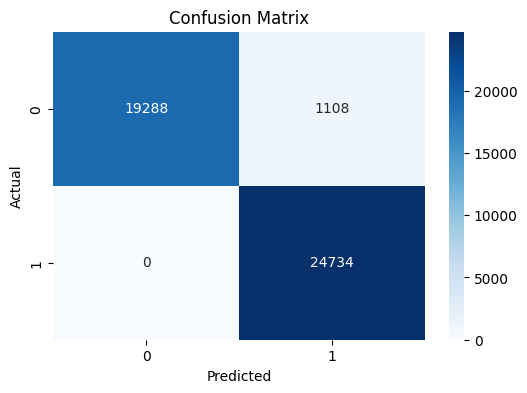

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


True Negatives (19,288):
These are orders that were actually on time and correctly predicted as on time.
This indicates the model is reliable at recognizing non-late shipments.

False Positives (1,108):
These are orders predicted as late but actually delivered on time.
This number is very small relative to total predictions, meaning the model rarely raises unnecessary alarms.

False Negatives (0):
The model did not miss a single late delivery.
This is extremely important in logistics because missing late shipments leads to unhappy customers and SLA failures.

True Positives (24,734):
These are orders that were actually late and correctly predicted as late.
This high value shows the model captures late shipments extremely well.




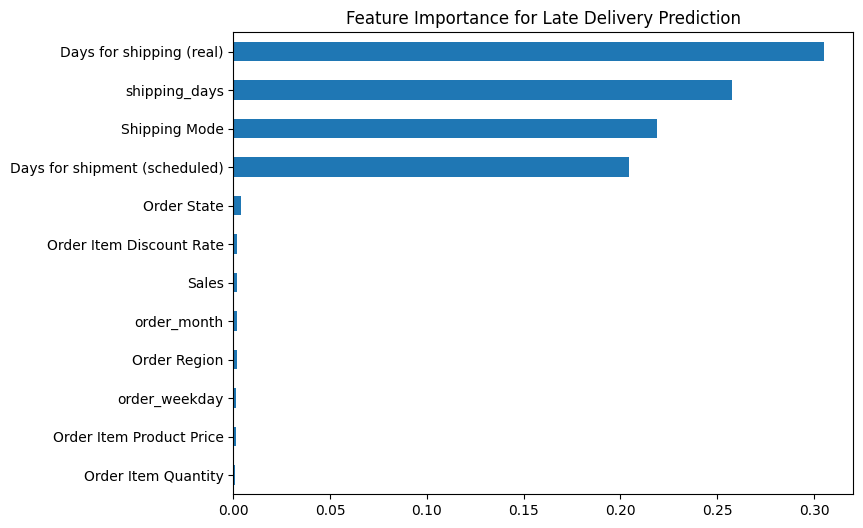

In [ ]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.sort_values().plot(kind="barh", figsize=(8,6))
plt.title("Feature Importance for Late Delivery Prediction")
plt.show()


The feature importance results show that late delivery risk is overwhelmingly influenced by logistics-related factors. Days for Shipping (Real) contributes the most at 31%, making it the strongest indicator of delay, followed by shipping_days, which accounts for 26% of the model’s predictive power. Shipping Mode plays a major role as well with 21%, confirming that slower modes significantly increase delay probability. Days for Shipment (Scheduled) adds another 20%, showing that unrealistic or tight promised timelines often lead to lateness. All other features—such as Order State, Discount Rate, Sales, Region, Month, Product Price, and Quantity—collectively contribute less than 2%, indicating that customer and product attributes have minimal impact. Overall, the model reveals that late deliveries are driven almost entirely by actual transit time, historical shipping duration, and shipping method, emphasizing that improvements in logistics planning and mode selection will yield the greatest reduction in delivery delays.